# Progetto di Big Data, Data Mining e Data Analysis

Dati ottenuti dalla demo di https://autovettura.car2db.com/

## Scopo dell'analisi

Nel corso degli anni, le dimensioni delle automobili sono aumentate sempre di più a causa delle maggiori norme di sicurezza e il costante tentativo di aumentare sempre più il tasso di sopravvivenza agli incidenti. Uno degli scopi di questa analisi è quindi vedere se questo processo è stato lineare nel tempo, vedendo se un modello creato ad hoc riuscirà a predire le dimensioni moderne; e poi in seconda sede vedere come è anche cambiato lo sviluppo del motore, anch'esso in costante evoluzione e se anche lì esiste un pattern predicibile o meno.
Prendiamo perciò in esame un piccolo database di autovetture dalla demo fornita gratuitamente dal sito di cui sopra, con dati di vetture che vanno dagli anni '60 fino a quasi il 2020

### Caricamento dei dati e preprocessamento

Carichiamo innanzitutto le librerie necessarie

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('auto.csv', encoding='latin-1')
df.head()

,Marca,Modello,Anno,Serie,Carrozzeria,Posti,Lunghezza,Larghezza,Altezza,Passo,...,Diametro cilindro,Corsa pistone,Cambio,Trazione,Velocità massima,Consumo città,Consumo extraurbano,Consumo misto,Accelerazione a 100 km/h,Volume serbatoio
0,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,82,64,Manuale,Anteriore,185.0,"10,7","6,3","7,9","11,2",51
1,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,80,"67,2",Manuale,Anteriore,178.0,"10,1","6,3","8,2","12,5",51
2,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,84,72,Manuale,Anteriore,185.0,"10,7","6,3","8,1",11,51
3,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,82,75,Manuale,Anteriore,195.0,"11,1","6,5","8,1","10,2",51
4,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,87,72,Manuale,Anteriore,200.0,"11,6","6,7","8,5","9,8",51


Qui di seguito le colonne e il numero di istanze non nulle. Come si può vedere alcune colonne hanno un alto numero di colonne nulle.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marca                     3278 non-null   object 
 1   Modello                   3278 non-null   object 
 2   Anno                      3278 non-null   int64  
 3   Serie                     3278 non-null   object 
 4   Carrozzeria               3278 non-null   object 
 5   Posti                     3278 non-null   int64  
 6   Lunghezza                 3278 non-null   int64  
 7   Larghezza                 3278 non-null   int64  
 8   Altezza                   3278 non-null   object 
 9   Passo                     3278 non-null   int64  
 10  Peso a vuoto              3096 non-null   float64
 11  Altezza da terra          2595 non-null   object 
 12  Volume bagagliaio         1318 non-null   float64
 13  Massa totale              1517 non-null   float64
 14  Alimenta

### Significato delle colonne
Nella lista seguente la spiegazione del contenuto della colonna e/o della sua unità di misura
- **`Marca`**: marca produttrice dell'autovettura. Nello specifico di questo dataset sono solo Alfa Romeo e Nissan
- **`Modello`**: il nome del modello specifico dell'automobile, ripetuto per tutte le sue varianti di quell'anno
- **`Serie`**: macrotipo specifico a cui l'autovettura appartiene (es: berlina a 4 porte)
- **`Carrozzeria`**: macrotipo generale a cui l'autovettura appartiene (es: berlina)
- **`Posti`**: numero di posti
- **`Lunghezza`**: millimetri
- **`Larghezza`**: millimetri
- **`Altezza`**: millimetri
- **`Passo`**: distanza tra i due assi in millimetri
- **`Peso a vuoto`**: chilogrammi
- **`Altezza da terra`**: millimetri
- **`Volume bagagliaio`**: litri
- **`Massa totale`**: chilogrammi
- **`Alimentazione`**: alimentazione del motore
- **`Cilindrata`**: centimetro cubo
- **`Cavalli`**: numero di cavalli della vettura
- **`Cilindri`**: numero di cilindri del motore
- **`Diametro cilindro`**: millimetri
- **`Corsa pistone`**: millimetri
- **`Cambio`**: tipo di cambio della vettura
- **`Trazione`**: tipo di trazione
- **`Velocità massima`**: kilometri orari
- **`Consumo città`**: consumo in contesto urbano, litri consumati ogni 100 km
- **`Consumo extraurbano`**: consumo in contesto extraurbano, litri consumati ogni 100 km
- **`Consumo misto`**: consumo in contesto misto, litri consumati ogni 100 km
- **`Accelerazione a 100 km/h`**: tempo necessario per il raggiungimento dei 100 km/h, secondi
- **`Volume serbatoio`**: volume del serbatoio in litri

Variabile da calcolare:
- **`Rapporto peso/potenza`**: quanti chilogrammi deve spingere ogni cavallo di potenza, chilogrammo su cavallo

Variabili target:
- **`anno, altezza, larghezza, lunghezza`**: studio delle dimensioni delle automobili
- **`anno, cilindrata, cavalli, velocità massima, massa totale, rapporto peso/potenza`**: studio dell'evoluzione del motore

Seppur le altre colonne possano offrire spunti interessanti, quali il rapporto tra cambio e potenza, o il consumo in relazione al peso, queste non verranno prese in considerazione per l'analisi in quanto si vuole mantenere il focus sulle due macroaree sopra descritte.

### Pulizia dei dati
Definiamo dunque le colonne che non saranno prese in considerazione per l'analisi e rimuoviamole dal dataset.

In [96]:
useless_features = ['Marca', 'Modello', 'Serie', 'Posti', 
                    'Passo', 'Peso a vuoto', 'Altezza da terra', 'Volume bagagliaio', 
                    'Alimentazione', 'Cilindri', 'Diametro cilindro', 'Corsa pistone', 'Accelerazione a 100 km/h',
                    'Cambio', 'Trazione', 'Consumo città', 'Consumo extraurbano', 'Consumo misto', 'Volume serbatoio']
df = df.drop(columns=useless_features)

Definiamo la colonna categorica

In [97]:
df['Carrozzeria'] = df['Carrozzeria'].astype('category')

Trasformiamo la colonna 'Altezza' in numerica

In [98]:
df['Altezza'] = pd.to_numeric(df['Altezza'], errors='coerce')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Anno              3278 non-null   int64   
 1   Carrozzeria       3278 non-null   category
 2   Lunghezza         3278 non-null   int64   
 3   Larghezza         3278 non-null   int64   
 4   Altezza           3276 non-null   float64 
 5   Massa totale      1517 non-null   float64 
 6   Cilindrata        3275 non-null   float64 
 7   Cavalli           3278 non-null   int64   
 8   Velocità massima  2059 non-null   float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 208.8 KB


Come possiamo vedere in ciò che rimane del dataset, la massa totale, parametro fondamentale per l'analisi, ha più della metà dei suoi valori come nulli.
A malincuore, per non compromettere la validità dell'analisi dobbiamo eliminarne tutte le istanze nulle.

In [100]:
df.dropna(inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 3260
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Anno              1259 non-null   int64   
 1   Carrozzeria       1259 non-null   category
 2   Lunghezza         1259 non-null   int64   
 3   Larghezza         1259 non-null   int64   
 4   Altezza           1259 non-null   float64 
 5   Massa totale      1259 non-null   float64 
 6   Cilindrata        1259 non-null   float64 
 7   Cavalli           1259 non-null   int64   
 8   Velocità massima  1259 non-null   float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 90.4 KB


#### Creazione della colonna rapporto peso/potenza

In [102]:
df['Rapporto peso/potenza'] = df['Massa totale'] / df['Cavalli']

In [103]:
df.head()

,Anno,Carrozzeria,Lunghezza,Larghezza,Altezza,Massa totale,Cilindrata,Cavalli,Velocità massima,Rapporto peso/potenza
0,1994,Berlina,4095,1710,1430.0,1655.0,1370.0,103,185.0,16.067961
1,1994,Berlina,4095,1710,1430.0,1670.0,1351.0,90,178.0,18.555556
2,1994,Berlina,4095,1710,1430.0,1670.0,1596.0,103,185.0,16.213592
3,1994,Berlina,4095,1710,1430.0,1685.0,1598.0,120,195.0,14.041667
4,1994,Berlina,4095,1710,1430.0,1715.0,1712.0,129,200.0,13.294574


Al costo di perdere buona parte del dataset, avendo dei dati completi possiamo ora procedere con l'analisi

### Analisi delle dimensioni delle automobili nel tempo

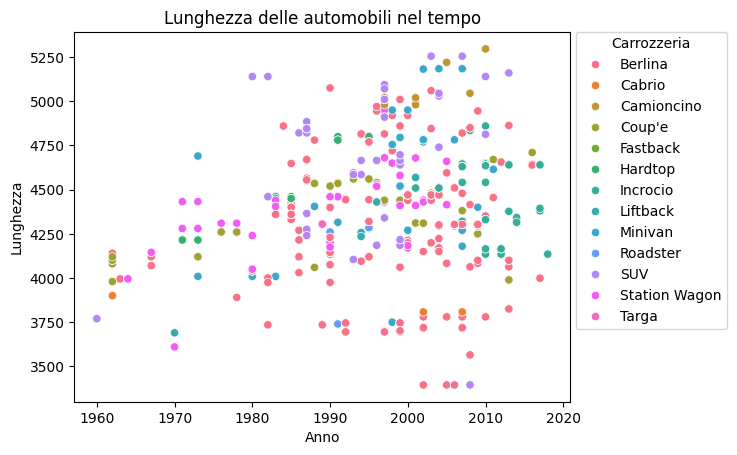

In [104]:
sns.scatterplot(data=df, x='Anno', y='Lunghezza', hue='Carrozzeria')
plt.title('Lunghezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

Dal grafico pare proprio che la lunghezza delle automobili sia aumentata nel tempo in maniera quasi lineare, analizziamo ora le altre due grandezze.

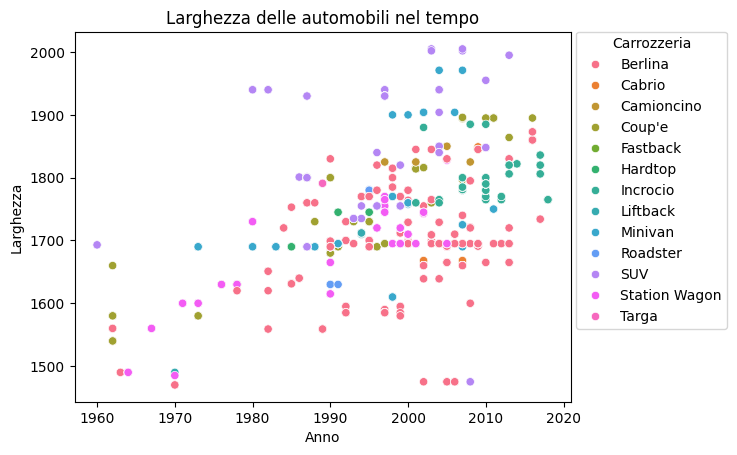

In [105]:
sns.scatterplot(data=df, x='Anno', y='Larghezza', hue='Carrozzeria')
plt.title('Larghezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

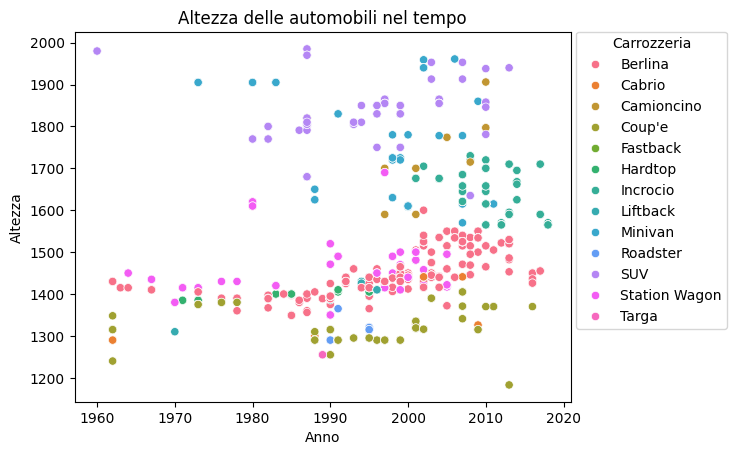

In [106]:
sns.scatterplot(data=df, x='Anno', y='Altezza', hue='Carrozzeria')
plt.title('Altezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

Come ci si poteva aspettare, la larghezzza delle automobili è anch'essa aumentata nel tempo, mentre l'altezza sembra essere rimasta costante fino al 2000 per poi aumentare leggermente negli anni seguenti.